# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [10]:
# your code here
xrate_ts = pd.read_csv('exch_rates.csv')
xrate_ts.Frequency = pd.to_datetime(xrate_ts.Frequency, format='%Y-%m-%d')
xrate_ts.set_index('Frequency', inplace=True)
xrate_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 215.8 KB


Plot the three exchange rates in one plot

Text(0.5, 1.0, 'Exchange Rate vs $')

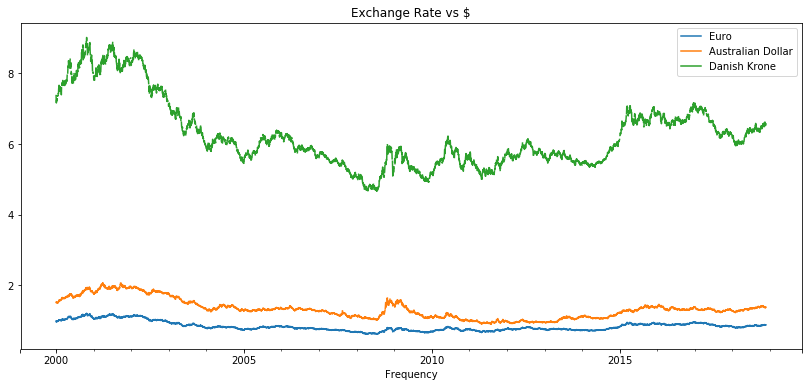

In [16]:
# your code here
xrate_ts.plot(figsize=(14,6))
plt.title('Exchange Rate vs $')

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [17]:
# your code here
xrate_ts.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

It looks like US exchange rate for euro and Danish Krone are highly correlated as well as Autralian $

The exchange rates for Euro and the Australian dollar are highly correlated, but there are differences. The Euro and the Danish Krone, however, is perfectly correlated. If you do further research you'll notice that the Danish Krone is pegged to the Euro, which means that they are basically designed to perfectly correlate together! The fact that the value is just veryvery close to 1 is due to rounding errors.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

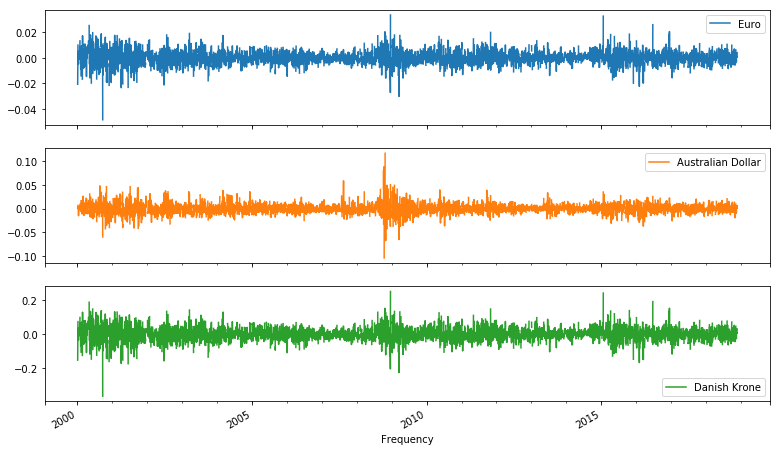

In [36]:
# your code here
xrate_diff_ts = xrate_ts.diff(periods=1)
xrate_diff_ts.plot(figsize = (13,8), subplots=True, legend=True);


In [37]:
# your code here
xrate_diff_ts.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


In [38]:
# your code here
# Differencing the series here led to a decrease in correlation between the EUR/USD and AUD/USD series.
# If you think a little further, this makes sense: in the lecture before, the high correlation was a result of
# seasonality. Differencing led to an increase in correlation between series, here the series are moving in the
# (more or less) same direction on a day-to-day basis and seasonality is not present, hence this result.

### Explain what's going on

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [39]:
# your code here
eur_usd_shift_1 = xrate_ts.Euro.shift(periods=1)

lag_1= pd.concat([eur_usd_shift_1, xrate_ts.Euro], axis=1)

lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Text(0.5, 1.0, 'Plot EUR rate 1 lag')

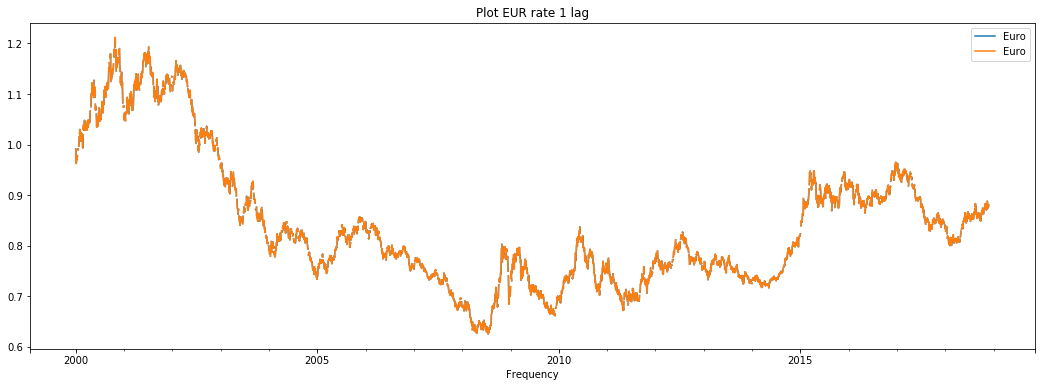

In [41]:
# your code here
lag_1.plot(figsize=(18,6))
plt.title('Plot EUR rate 1 lag')

In [ ]:
# your code here

Repeat this, but for a "lag 5 autocorrelation"

In [50]:
# your code here
eur_usd_shift_5 = xrate_ts.Euro.shift(periods=50)

lag_5= pd.concat([eur_usd_shift_5, xrate_ts.Euro], axis=1)

lag_5.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


Text(0.5, 1.0, 'Plot EUR rate 5 lags')

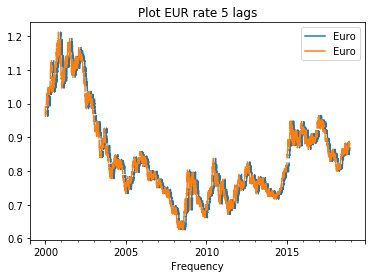

In [51]:
# your code here
lag_5.plot()
plt.title('Plot EUR rate 5 lags')

### What's your conclusion here?
Autocorrelation is very high in these time series, even up to a lag as big as 50! This is no big surprise though: remember that these are random walk series, which are highly recursive, as each value depends heavily on the previous one!

Knowing this, let's plot the ACF now.

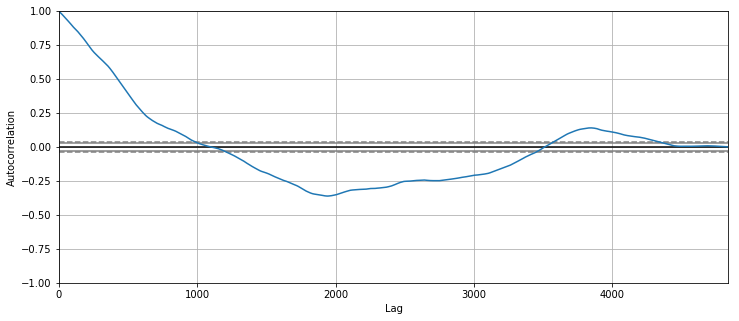

In [55]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(xrate_ts.Euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

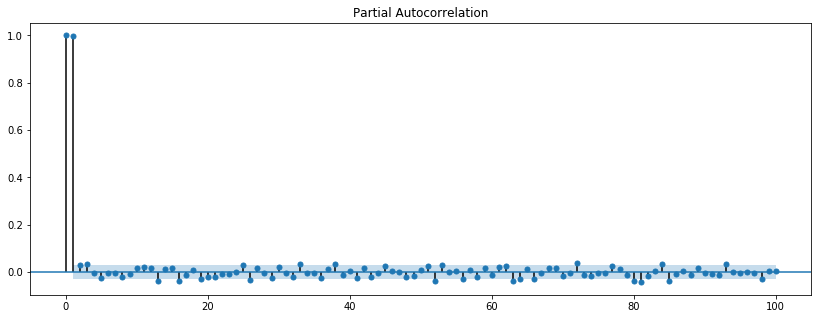

In [58]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(xrate_ts.Euro.dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

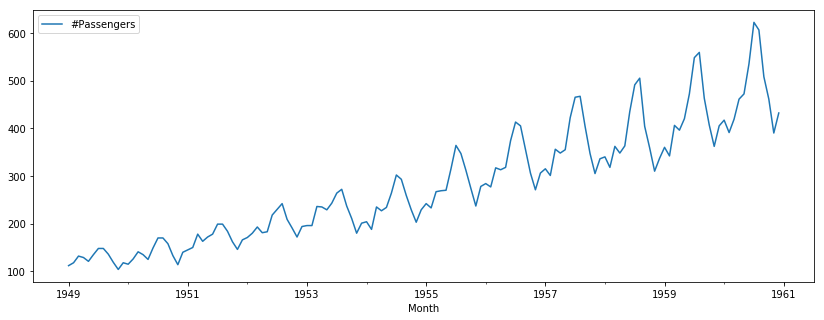

In [67]:
# your code here
passenger_ts = pd.read_csv('passengers.csv')
passenger_ts.Month = pd.to_datetime(passenger_ts.Month, format='%Y-%m-%d')
passenger_ts.set_index('Month', inplace=True)
passenger_ts.head()
passenger_ts.plot()

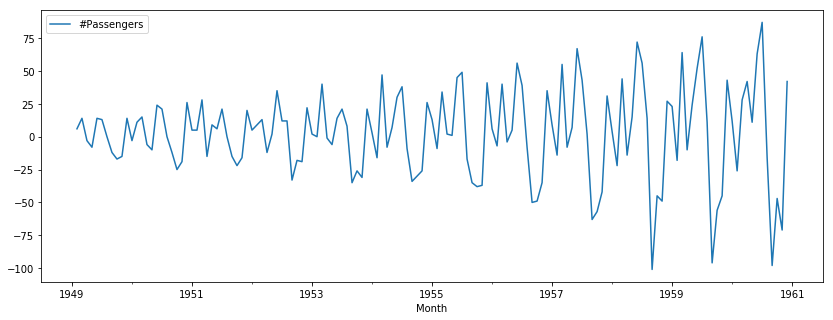

In [66]:
# your code here
diff_passenger_ts = passenger_ts.diff(periods=1)
diff_passenger_ts.plot()

In [68]:
# your code here
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pl

SyntaxError: invalid syntax (<ipython-input-68-070f94b8437b>, line 2)

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!